# NASAstronauts
An astronaut is a human being who travels in space or is transported by something that does it. Thanks to this dataset we can know many curiosities about these "magic" people. This information relates to the generalities of astronauts from 1959 to 2017. In fact, in April 9, 1959, nine astronauts were selected for the Mercury Progra, one of the firsts SPACE programs.

## Dataset
This dataset (astronauts.csv) has nineteen columns, organized as follows: Name, Year, Group, Status, Birthdate, Birthplace, Gender, Alma mater, Undergraduate and Graduate Major.

## Question 
1) What is the average age of astronauts on duty? <br />
2) What are the most common academic studies? <br />
3) Have most astronauts served in the military? Which branch? <br />
4) What are the astronauts with more space walks? With how many hours? <br />
5) Are there more female or male? <br />
6) What is the average age of death? <br />

## Let's start
First of all, we need to import all the modules, in particular Pandas and Numpy for the data manipulation, then Matplotlib and Seaborn for the data visualization. Datetime and dateutil will be useful for working on ages. 

In [213]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from datetime import date
from dateutil.relativedelta import relativedelta

Then we need to import the dataset that we'll use

In [346]:
df = pd.read_csv('CSV/astronauts.csv')

Let's see the first input

In [59]:
df.head(1)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN


### 1) What is the average age of astronauts on duty? 
We need to focus just on the records with Status = "Active", and then we can calculate the average. We suppose for simplicity that they're currently active in 2020. We'll use another dataframe with just the born date of active astronauts.

In [48]:
df_years = df[df["Status"] == "Active"]
df_years = df_years[['Birth Date']]
df_years.head(3)

,Birth Date
0,5/17/1967
11,8/23/1967
15,11/26/1963


Before going on, we have to check in there is any null value

In [60]:
df_years.isnull().sum()

Birth Date    0
Age           0
dtype: int64

Perfect, there is no null value, now we can add another column with the equivalent ages. 

In [56]:
end_date = datetime.now()
df_years["Age"] = df_years.apply(lambda x: 
                                     relativedelta(end_date, 
                                                   datetime.strptime(x["Birth Date"], '%m/%d/%Y')
                                ).years, axis=1)

df_years.head(3)

,Birth Date,Age
0,5/17/1967,53
11,8/23/1967,52
15,11/26/1963,56


In [61]:
df_years["Age"].mean()

54.34

**So the average age of astronauts on duty is 53.34 years!**

### 2) What are the most common academic studies? 
In this case we can use the "groupby" function and then count the occurrencies. After that, we can plot as we prefer, in this case I'll use a simple sns.barplot

Text(0.5, 0, 'Occorrencies')

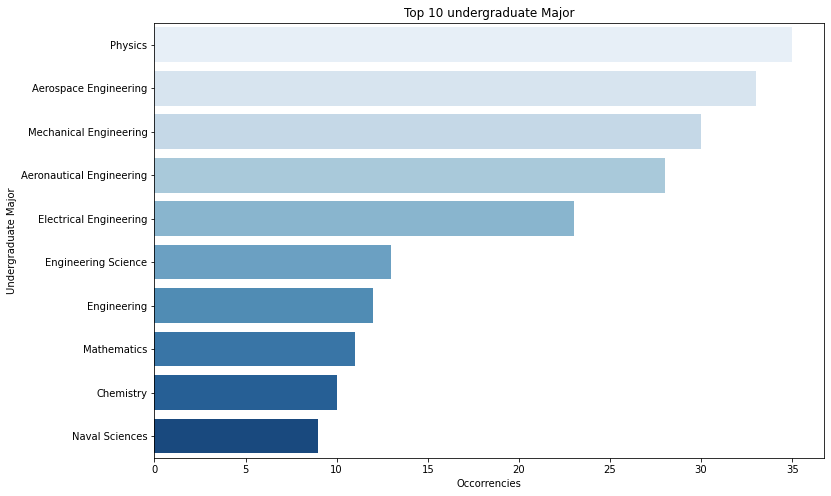

In [109]:
undergraduate = df.groupby(["Undergraduate Major"]).count()['Name'].sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 8))
sns.barplot(y=undergraduate.index, x=undergraduate.values, palette="Blues").set_title("Top 10 undergraduate Major")
plt.xlabel("Number of occurrences")

Text(0.5, 0, 'Number of occurrences')

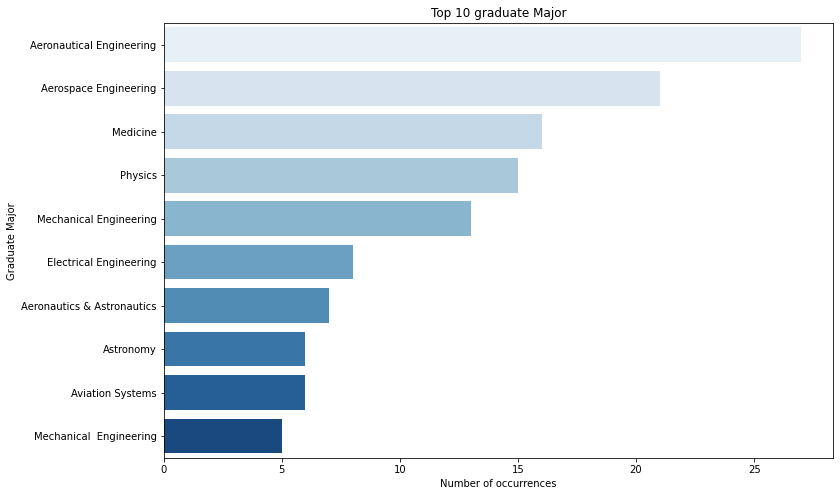

In [114]:
graduate = df.groupby(["Graduate Major"]).count()['Name'].sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 8))
sns.barplot(y=graduate.index, x=graduate.values, palette="Blues").set_title("Top 10 graduate Major")
plt.xlabel("Number of occurrences")

### 3) Have most astronauts served in the military? Which branch?
This time we need to focus also on "null" values, beacuse it means that that astronauts did not serve in the military. So, for asking to this question we can replace NaN to "None" and considering it as an option. 

In [221]:
df_military = df.fillna({'Military Branch':'None'})
df_military["Military Branch"][:5]

0                      None
1                      None
2         US Army (Retired)
3    US Air Force (Retired)
4    US Air Force (Retired)
Name: Military Branch, dtype: object

Now, as before, we can use the groupby function and plot the result in a pieplot.

In [222]:
df_military.groupby(["Military Branch"]).count()['Name'].sort_values(ascending=False)

Military Branch
None                               146
US Air Force (Retired)              61
US Navy (Retired)                   59
US Navy                             21
US Air Force                        21
US Marine Corps (Retired)           17
US Army (Retired)                   13
US Army                              4
US Marine Corps                      3
US Air Force Reserves (Retired)      3
US Naval Reserves                    2
US Marine Corps Reserves             2
US Coast Guard (Retired)             2
US Air Force Reserves                2
US Naval Reserves (Retired)          1
Name: Name, dtype: int64

Before we plot, we need to replace this "(Retired)" with the classic one. We can do this by the replace function. The first array contains all the value that we wanna replace, and the second one contains all the corresponding ones. 

In [223]:
df_military = df_military.replace(["US Air Force (Retired)","US Air Force Reserves (Retired)",
                                   "US Army (Retired)","US Coast Guard (Retired)",
                                   "US Marine Corps (Retired)","US Naval Reserves (Retired)",
                                   "US Navy (Retired)"],
                                 
                                  ["US Air Force", "US Air Force Reserves","US Army","US Coast Guard",
                                   "US Marine Corps","US Naval Reserves", "US Navy"]
                                 ).groupby(["Military Branch"]).count()['Name'].sort_values(ascending=False)
df_military

Military Branch
None                        146
US Air Force                 82
US Navy                      80
US Marine Corps              20
US Army                      17
US Air Force Reserves         5
US Naval Reserves             3
US Marine Corps Reserves      2
US Coast Guard                2
Name: Name, dtype: int64

Now we're finally ready to plot our result in a pie chart! For editing the default color, it can be helpful "cm" from Matplotlib, in fact we choose for the "tab20c" palette.

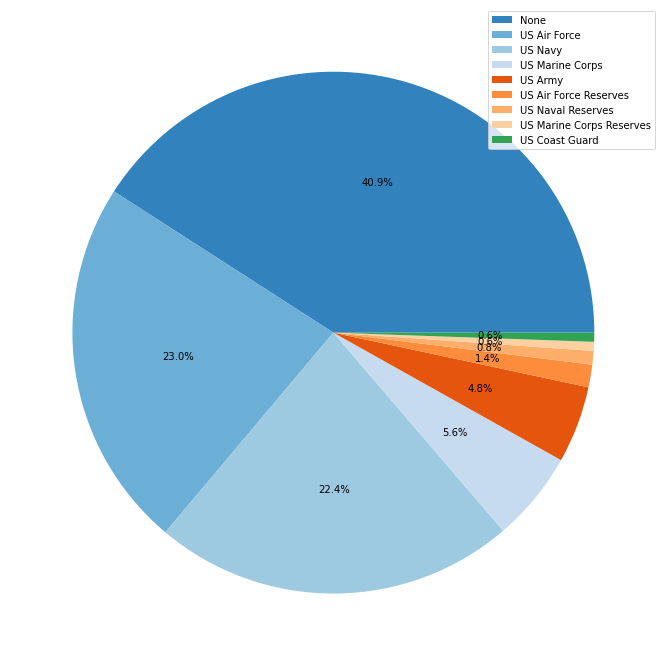

In [249]:
cs=cm.tab20c(np.arange(40))

plt.figure(figsize=(12,12))
plt.pie(df_military.values, colors=cs, autopct='%.1f%%')

plt.ylabel(None)
plt.legend(df_military.index, loc="upper right")

### 4) What are the astronauts with more space walks? With how many hours?
Let's clean the dataset for making our process a bit easier. For a better visualization we'll consider just the first 10 results.

In [296]:
df_walks = df[['Name','Space Walks']].sort_values('Space Walks', ascending=False)[:10]
df_walks.head(1)

,Name,Space Walks
203,Michael E. Lopez-Alegria,10


In [295]:
df_walks_hr = df[['Name','Space Walks (hr)']].sort_values('Space Walks (hr)', ascending=False)[:10]
df_walks_hr.head(1)

,Name,Space Walks (hr)
203,Michael E. Lopez-Alegria,67.0


Now we can plot these results 

<AxesSubplot:xlabel='Space Walks (hr)', ylabel='Name'>

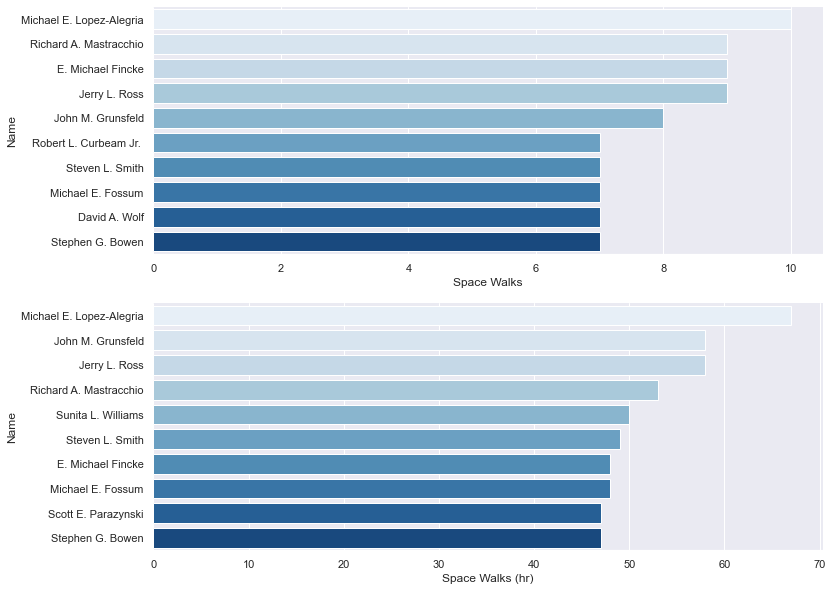

In [299]:
f, axes = plt.subplots(2,1, figsize=(12, 10))
sns.despine(left=True)

sns.barplot(y=df_walks['Name'], x=df_walks['Space Walks'], ax=axes[0], palette="Blues")
sns.barplot(y=df_walks_hr['Name'], x=df_walks_hr['Space Walks (hr)'], ax=axes[1], palette="Blues")

### 5) Are there more female or male?
Also in this case we have to use the groupby function. We'll plot the results in a piechart and in a barchart to highlight the differences.

In [321]:
df_gender = df.groupby('Gender')['Gender'].count()
df_gender.values

array([ 50, 307], dtype=int64)

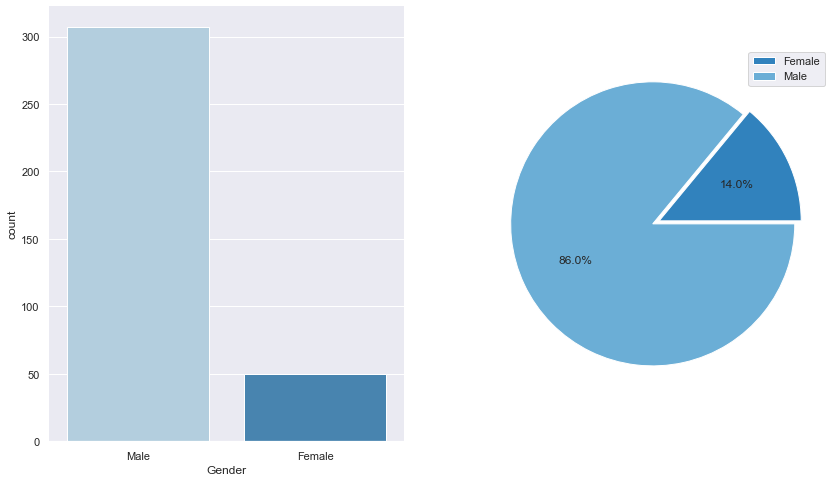

In [335]:
f, axes = plt.subplots(1,2, figsize=(14, 8))

sns.despine(left=True)
sns.countplot(x=df['Gender'], ax=axes[0], palette="Blues")


cs=cm.tab20c(np.arange(40))
explode =(0.05,0)
plt.pie(df_gender, colors=cs, autopct='%.1f%%',explode=explode)
plt.legend(df_gender.index, loc="upper right")

### 6) What is the average age of death? 
We need another column "Age of death" where we'll insert the difference between death date and born that, then we have to calculate the average thanks to the mean() function. To avoid changing the original dataset I prefer to create another copy. 

In [348]:
df_agedeath = df[['Birth Date', 'Death Date']]
df_agedeath.head(5)

,Birth Date,Death Date
0,5/17/1967,NaN
1,3/7/1936,NaN
2,3/3/1946,NaN
3,5/20/1951,NaN
4,1/20/1930,NaN


As we can see, there are so many astronauts still alive (luckly), so we have to make a choice about null values. Since we need to focus just on the death astronauts I think we can delete this records with the function dropna().

In [349]:
df_agedeath = df_agedeath.dropna()
df_agedeath.head(5)

,Birth Date,Death Date
10,12/25/1959,2/1/2003
14,8/5/1930,8/25/2012
24,12/30/1931,2/28/1966
36,8/12/1951,7/23/2006
42,4/16/1956,2/1/2003


Now we can calculate di exactly age and the average age of death

In [354]:
df_agedeath['Age of death'] = df_agedeath.apply(
                                            lambda x: relativedelta(
                                                        datetime.strptime(x["Death Date"], '%m/%d/%Y'), 
                                                        datetime.strptime(x["Birth Date"], '%m/%d/%Y')
                                ).years, axis=1)
df_agedeath['Age of death'].mean()

51.17307692307692

Sadly, the average age of death is **51.17 years**. It's probably beacause the death astronauts belongs mostly to the past "era" of astronautics and they were  